# Výzva: Analýza textu o datové vědě

V tomto příkladu si vyzkoušíme jednoduché cvičení, které pokrývá všechny kroky tradičního procesu datové vědy. Nemusíte psát žádný kód, stačí kliknout na buňky níže, abyste je spustili a pozorovali výsledek. Jako výzvu vás povzbuzujeme, abyste tento kód vyzkoušeli s různými daty.

## Cíl

V této lekci jsme diskutovali různé koncepty související s datovou vědou. Pojďme se pokusit objevit další související koncepty pomocí **těžby textu**. Začneme textem o datové vědě, z něj extrahujeme klíčová slova a poté se pokusíme vizualizovat výsledek.

Jako text použiji stránku o datové vědě z Wikipedie:


In [62]:
url = 'https://en.wikipedia.org/wiki/Data_science'

## Krok 1: Získání dat

Prvním krokem v každém procesu datové vědy je získání dat. K tomu použijeme knihovnu `requests`:


In [63]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Data science - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"1a104647-90de-485a-b88a-1406e889a5d1","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Data_science","wgTitle":"Data science","wgCurRevisionId":1038046078,"wgRevisionId":1038046078,"wgArticleId":35458904,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: others","Articles with short description","Short description matches Wikidata","Use dmy dates from December 2012","Information science","Computer occupations"

## Krok 2: Transformace dat

Dalším krokem je převést data do formy vhodné pro zpracování. V našem případě jsme stáhli HTML zdrojový kód ze stránky a potřebujeme jej převést na čistý text.

Existuje mnoho způsobů, jak to lze provést. My použijeme nejjednodušší vestavěný objekt [HTMLParser](https://docs.python.org/3/library/html.parser.html) z Pythonu. Musíme vytvořit podtřídu třídy `HTMLParser` a definovat kód, který bude shromažďovat veškerý text uvnitř HTML tagů, s výjimkou tagů `<script>` a `<style>`.


In [64]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Data science - Wikipedia Data science From Wikipedia, the free encyclopedia Jump to navigation Jump to search Interdisciplinary field of study focused on deriving knowledge and insights from data Not to be confused with  information science . The existence of  Comet NEOWISE  (here depicted as a series of red dots) was discovered by analyzing  astronomical survey  data acquired by a  space telescope , the  Wide-field Infrared Survey Explorer . Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection AutoML Association rules Reinforcement learning Structured prediction Feature engineering Feature learning Online learning Semi-supervised learning Unsupervised learning Learning to rank Grammar induction Supervised learning ( classification  •  regression ) Decision trees Ensembles Bagging Boosting Random forest k -NN Linear regression Naive Bayes Artificial neural networks Logistic regression Perceptron Relevance vector machine 

## Krok 3: Získávání poznatků

Nejdůležitějším krokem je přeměnit naše data do podoby, ze které můžeme získat poznatky. V našem případě chceme z textu extrahovat klíčová slova a zjistit, která klíčová slova jsou významnější.

Použijeme Python knihovnu nazvanou [RAKE](https://github.com/aneesha/RAKE) pro extrakci klíčových slov. Nejprve tuto knihovnu nainstalujeme, pokud ji ještě nemáme:


In [65]:
import sys
!{sys.executable} -m pip install nlp_rake

C:\winapp\Miniconda3\lib\site-packages\secretstorage\dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
C:\winapp\Miniconda3\lib\site-packages\secretstorage\util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


Hlavní funkčnost je dostupná z objektu `Rake`, který můžeme přizpůsobit pomocí některých parametrů. V našem případě nastavíme minimální délku klíčového slova na 5 znaků, minimální frekvenci klíčového slova v dokumentu na 3 a maximální počet slov v klíčovém slově na 2. Neváhejte experimentovat s jinými hodnotami a pozorovat výsledek.


In [66]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('machine learning', 4.0),
 ('big data', 4.0),
 ('data scientist', 4.0),
 ('21st century', 4.0),
 ('data science', 3.909090909090909),
 ('computer science', 3.909090909090909),
 ('information science', 3.797979797979798),
 ('data analysis', 3.666666666666667),
 ('application domains', 3.6),
 ('science', 1.9090909090909092),
 ('field', 1.25),
 ('statistics', 1.2272727272727273),
 ('classification', 1.2),
 ('techniques', 1.1666666666666667),
 ('datasets', 1.0),
 ('education', 1.0),
 ('archived', 1.0),
 ('original', 1.0),
 ('chikio', 1.0),
 ('forbes', 1.0)]

Získali jsme seznam termínů spolu s jejich stupněm důležitosti. Jak můžete vidět, nejrelevantnější obory, jako je strojové učení a velká data, se nacházejí na předních pozicích seznamu.

## Krok 4: Vizualizace výsledku

Lidé nejlépe interpretují data ve vizuální podobě. Proto často dává smysl data vizualizovat, abychom získali určité poznatky. Můžeme použít knihovnu `matplotlib` v Pythonu k vykreslení jednoduchého rozložení klíčových slov podle jejich relevance:


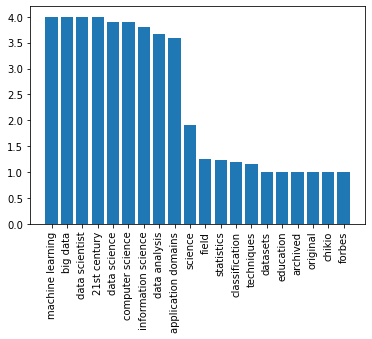

In [67]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res)

Existuje však ještě lepší způsob, jak vizualizovat frekvence slov - pomocí **Word Cloud**. Budeme muset nainstalovat další knihovnu, abychom vytvořili word cloud z našeho seznamu klíčových slov.


In [71]:
!{sys.executable} -m pip install wordcloud

Objekt `WordCloud` je zodpovědný za přijetí buď původního textu, nebo předem vypočítaného seznamu slov s jejich frekvencemi, a vrací obrázek, který lze následně zobrazit pomocí `matplotlib`:


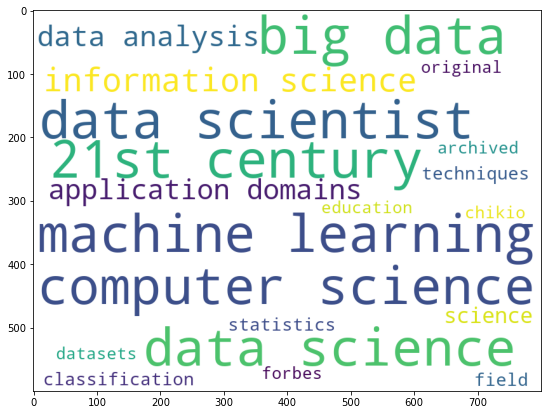

In [69]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))

Můžeme také předat původní text do `WordCloud` - podívejme se, zda dokážeme získat podobný výsledek:


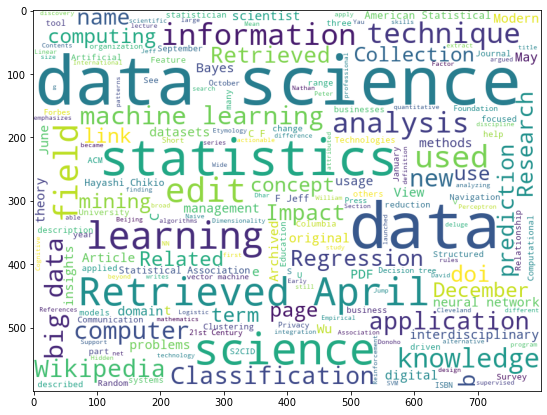

In [70]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

Můžete vidět, že slovní mrak nyní vypadá působivěji, ale zároveň obsahuje hodně šumu (např. nesouvisející slova jako `Retrieved on`). Také získáváme méně klíčových slov, která se skládají ze dvou slov, jako například *data scientist* nebo *computer science*. To je způsobeno tím, že algoritmus RAKE odvádí mnohem lepší práci při výběru kvalitních klíčových slov z textu. Tento příklad ukazuje důležitost předzpracování a čištění dat, protože jasný obraz na konci nám umožní dělat lepší rozhodnutí.

V tomto cvičení jsme prošli jednoduchým procesem extrakce určitého významu z textu na Wikipedii, ve formě klíčových slov a slovního mraku. Tento příklad je poměrně jednoduchý, ale dobře demonstruje všechny typické kroky, které datový vědec podnikne při práci s daty, od získávání dat až po vizualizaci.

V našem kurzu budeme všechny tyto kroky podrobně probírat.



---

**Prohlášení**:  
Tento dokument byl přeložen pomocí služby pro automatický překlad [Co-op Translator](https://github.com/Azure/co-op-translator). I když se snažíme o přesnost, mějte prosím na paměti, že automatické překlady mohou obsahovat chyby nebo nepřesnosti. Původní dokument v jeho původním jazyce by měl být považován za autoritativní zdroj. Pro důležité informace se doporučuje profesionální lidský překlad. Neodpovídáme za žádná nedorozumění nebo nesprávné interpretace vyplývající z použití tohoto překladu.
